In [2]:
import pymc as pm


parameter = pm.Exponential("poisson_param", 1)
data_generator = pm.Poisson("data_generator", parameter)
data_plus_one = data_generator + 1

In [3]:
print "Children of `parameter`: "
print parameter.children
print "\nParents of `data_generator`: "
print data_generator.parents
print "\nChildren of `data_generator`: "
print data_generator.children

Children of `parameter`: 
set([<pymc.distributions.Poisson 'data_generator' at 0x000000002118B630>])

Parents of `data_generator`: 
{'mu': <pymc.distributions.Exponential 'poisson_param' at 0x00000000043663C8>}

Children of `data_generator`: 
set([<pymc.PyMCObjects.Deterministic '(data_generator_add_1)' at 0x0000000004366358>])


In [4]:
beta_1 = pm.Uniform("beta_1", 0, 1)
beta_2 = pm.Uniform("beta_2", 0, 1)

In [5]:
lambda_1 = pm.Exponential("lambda_1", 1)  # prior on first behaviour
lambda_2 = pm.Exponential("lambda_2", 1)  # prior on second behaviour
tau = pm.DiscreteUniform("tau", lower=0, upper=10)  # prior on behaviour change

print "lambda_1.value = %.3f" % lambda_1.value
print "lambda_2.value = %.3f" % lambda_2.value
print "tau.value = %.3f" % tau.value
print

lambda_1.random(), lambda_2.random(), tau.random()

print "After calling random() on the variables..."
print "lambda_1.value = %.3f" % lambda_1.value
print "lambda_2.value = %.3f" % lambda_2.value
print "tau.value = %.3f" % tau.value

lambda_1.value = 0.325
lambda_2.value = 0.790
tau.value = 8.000

After calling random() on the variables...
lambda_1.value = 0.147
lambda_2.value = 0.846
tau.value = 7.000


In [6]:
type(lambda_1 + lambda_2)

pymc.PyMCObjects.Deterministic

In [7]:
import numpy as np
n_data_points = 5  # in CH1 we had ~70 data points


@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_data_points)
    out[:tau] = lambda_1  # lambda before tau is lambda1
    out[tau:] = lambda_2  # lambda after tau is lambda2
    return out

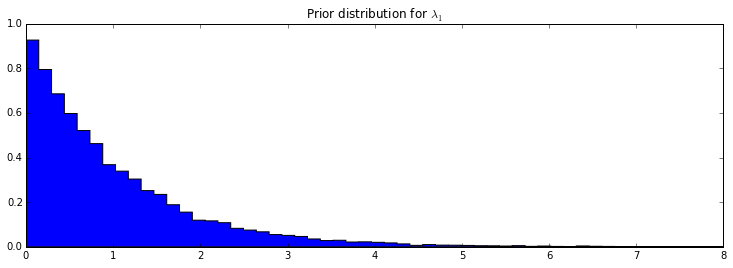

In [8]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(12.5, 4)


samples = [lambda_1.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")
plt.title("Prior distribution for $\lambda_1$")
plt.xlim(0, 8);

In [9]:
data = np.array([10, 5])
fixed_variable = pm.Poisson("fxd", 1, value=data, observed=True)
print "value: ", fixed_variable.value
print "calling .random()"
fixed_variable.random()
print "value: ", fixed_variable.value

value:  [10  5]
calling .random()
value:  [10  5]


In [10]:
# We're using some fake data here
data = np.array([10, 25, 15, 20, 35])
obs = pm.Poisson("obs", lambda_, value=data, observed=True)
print obs.value

[10 25 15 20 35]


In [11]:
model = pm.Model([obs, lambda_, lambda_1, lambda_2, tau])

In [13]:
tau = pm.rdiscrete_uniform(0, 80)
print tau

34


In [14]:
alpha = 1. / 20.
lambda_1, lambda_2 = pm.rexponential(alpha, 2)
print lambda_1, lambda_2

46.504824399 46.294926123


In [15]:
data = np.r_[pm.rpoisson(lambda_1, tau), pm.rpoisson(lambda_2, 80 - tau)]

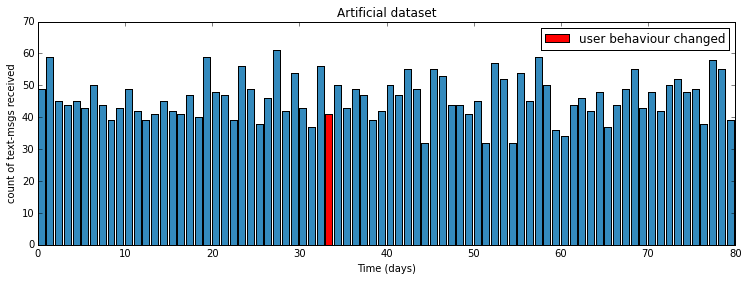

In [16]:
plt.bar(np.arange(80), data, color="#348ABD")
plt.bar(tau - 1, data[tau - 1], color="r", label="user behaviour changed")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Artificial dataset")
plt.xlim(0, 80)
plt.legend();